In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns

In [3]:
# Step 1: Load the data
data = pd.read_csv('New_Housing_clean_data.csv')

# Step 2: Clean and fill missing values
data['area'] = data['area'].fillna(data['area'].mean())
data['status'] = data['status'].fillna('None')
data['bhk'] = data['bhk'].fillna(data['bhk'].mean())
data['bathroom'] = data['bathroom'].fillna(data['bathroom'].mean())
data['age'] = data['age'].fillna(data['age'].mean())

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)
print("R-squared value:", r2)


R-squared value: 0.6474230480925929


In [4]:
# Print the predicted and actual values
print("Predicted Values:", y_pred)
print("Actual Values:", y_test)

Predicted Values: [-8.61995972e+05  1.11320721e+07  2.61753298e+06  5.20346538e+07
  1.94063485e+07  4.69655676e+06  6.69704195e+06  4.23675072e+06
  9.28584156e+06  1.71995206e+06  3.93558131e+06  9.01393824e+06
  8.66062861e+06  7.16153953e+06  3.16112208e+06  3.16831520e+05
  6.46308833e+06  5.92084761e+06  8.07030886e+06  1.72641280e+06
  2.44553301e+06  2.16972856e+06  8.76266420e+06  4.70502283e+06
  3.14446016e+06  1.63526812e+06  7.66369421e+06  4.10240939e+06
  9.81674613e+06  3.04260558e+06  1.68686632e+07  8.56289373e+06
  1.05893498e+07  6.48131373e+06  8.91267120e+06  2.87368726e+05
  3.92065450e+06  4.15425753e+06  9.32057060e+06  1.21517899e+07
  2.72914248e+06 -6.63887025e+04  1.31668133e+07  5.51259763e+06
  6.65574110e+06  5.36332948e+06  1.74358821e+07  2.96084971e+06
  5.07154602e+06  4.91850467e+06  1.27637893e+07  7.98338110e+06
  7.90611390e+06  4.80133654e+06  4.47394186e+06  1.96318902e+07
  3.12504467e+06  4.47642622e+06  1.31966669e+07  7.85299685e+06
  1.976

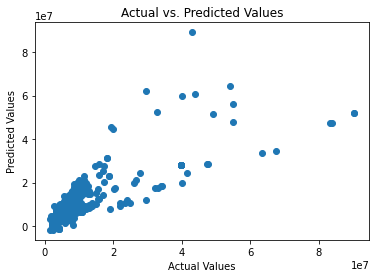

In [11]:
# Plotting the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

<AxesSubplot:>

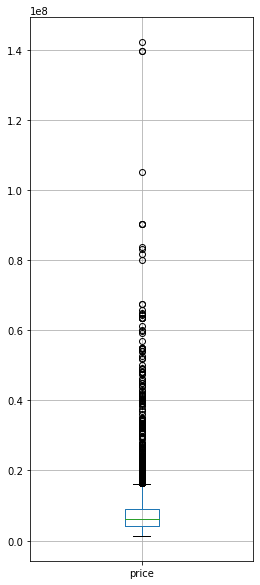

In [13]:
plt.figure(figsize=(4, 10))
data.boxplot(column=['price'])

In [42]:
import statsmodels.api as sm

#define response variable
y = data['price']

#define explanatory variable
x = data[['area']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     874.8
Date:                Sat, 08 Jul 2023   Prob (F-statistic):          8.90e-118
Time:                        11:19:40   Log-Likelihood:                -9735.4
No. Observations:                 580   AIC:                         1.947e+04
Df Residuals:                     578   BIC:                         1.948e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -5.93e+06   4.95e+05    -11.988      0.0

C:\Users\ssudh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


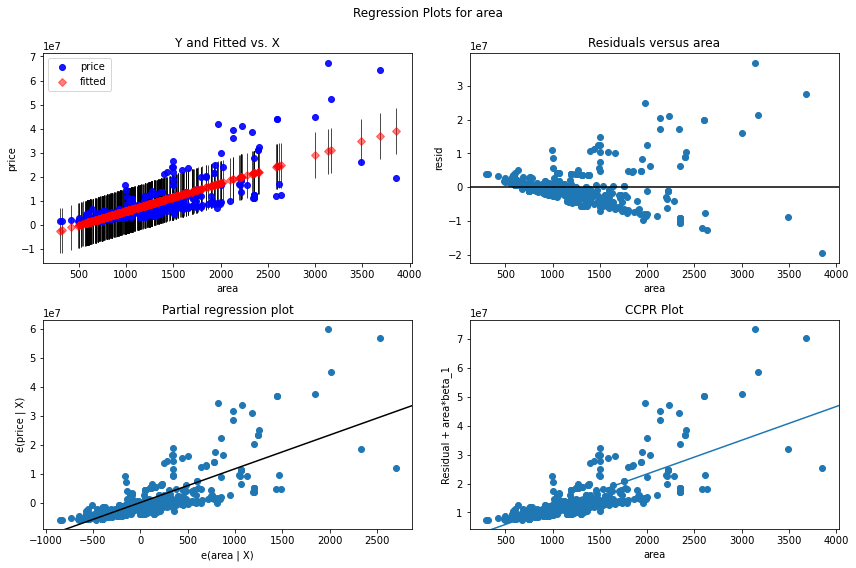

In [45]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce residual plots
fig = sm.graphics.plot_regress_exog(model, 'area', fig=fig)

(0.0, 70965344.90380648)

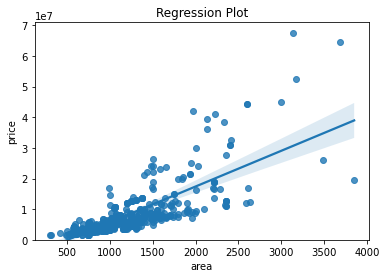

In [48]:
import seaborn as sns

sns.regplot(x="area", y="price", data=data)
plt.title("Regression Plot")
plt.ylim(0,) 

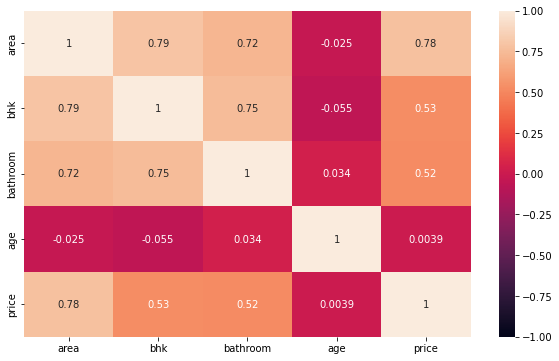

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)

In [50]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient and p-value
pearson_coef, p_value = pearsonr(data['area'], data['price'])

# Print the results
print("Pearson Correlation Coefficient:", pearson_coef)
print("P-value:", p_value)

Pearson Correlation Coefficient: 0.7759834930693486
P-value: 8.896472760549815e-118


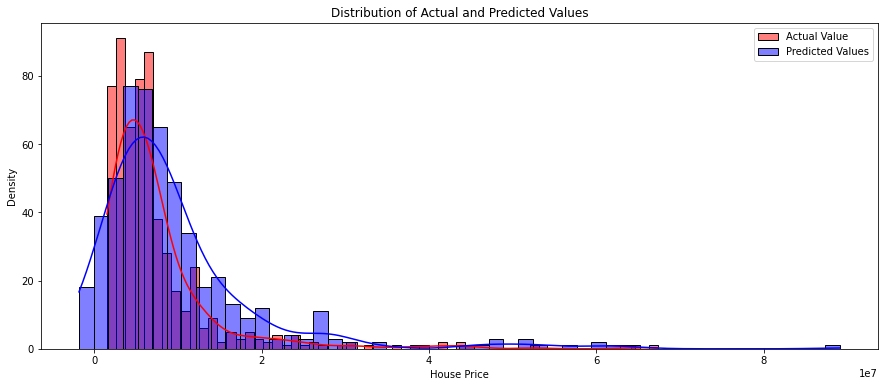

In [51]:
# Set the figure size
plt.figure(figsize=(15, 6))  # Set the width and height according to your preference

# Create the distribution plot for the actual values
sns.histplot(data['price'], color='r', label='Actual Value', kde=True)

# Create the distribution plot for the predicted values
sns.histplot(y_pred, color='b', label='Predicted Values', kde=True)

# Set the plot title and labels
plt.title('Distribution of Actual and Predicted Values')
plt.xlabel('House Price')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming y_test and y_pred are the actual and predicted target values, respectively

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 3989165.515605478
Mean Squared Error (MSE): 46969059777358.305
Root Mean Squared Error (RMSE): 6853397.681249666


<AxesSubplot:xlabel='area', ylabel='price'>

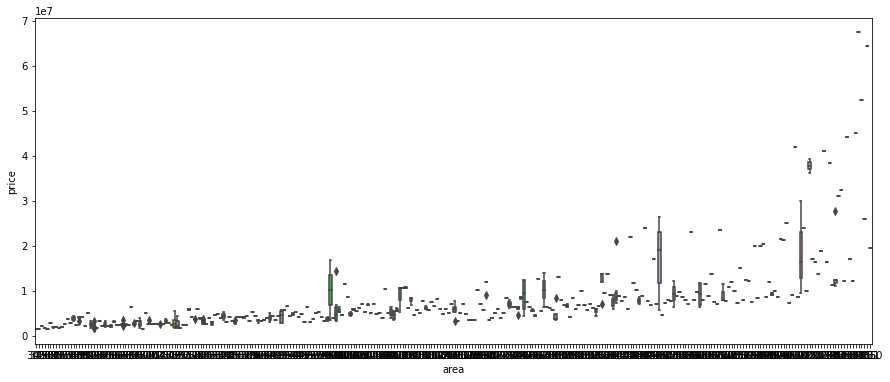

In [54]:
# Set the figure size
plt.figure(figsize=(15, 6))

sns.boxplot(x=data["area"], y=data["price"])

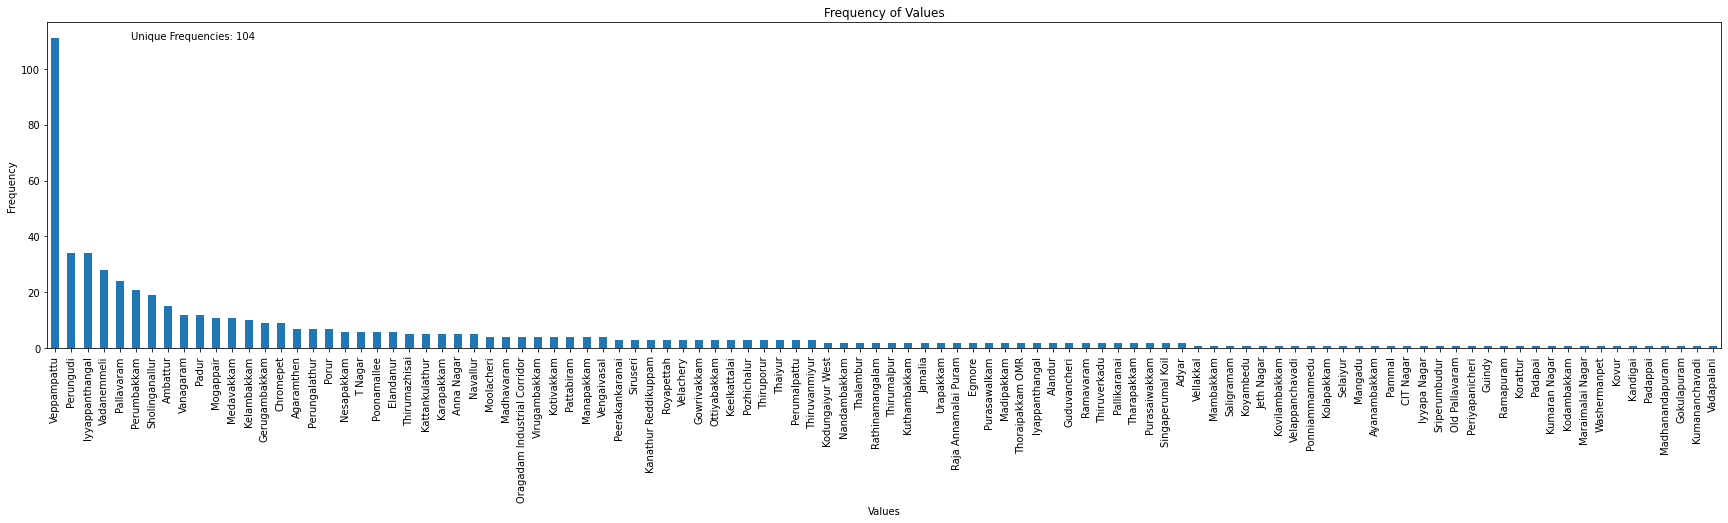

In [55]:
# Calculate the frequency of values in a column
frequency = data['location'].value_counts()

# Get the number of unique frequencies
num_frequencies = len(frequency)

# Set the size of the plot
plt.figure(figsize=(30, 6))  # Specify the width and height of the plot

# Plot the frequency as a bar chart
frequency.plot.bar()

# Set the labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Frequency of Values')

# Add text annotation for the number of unique frequencies
plt.text(0.05, 0.95, f'Unique Frequencies: {num_frequencies}', transform=plt.gca().transAxes)

# Display the plot
plt.show()